## This portion of the code is for the EDA and summary statistics for the shipment/prescription data

In [28]:
# import the packages
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')


In [29]:
fa = pd.read_csv('https://raw.githubusercontent.com/MIDS-at-Duke/pds-2022-turquoise-team/main/20_intermediate_files/df_florida_only_grouped.csv?token=GHSAT0AAAAAABZL4AJF3TKXK7DMYSXG32EEY4T4LTQ')
fa.head()

,Year,State,BUYER_STATE,BUYER_COUNTY,Population,T_YEAR,MME
0,2007,Florida,FL,ALACHUA,242685,2007,95259.627977
1,2007,Florida,FL,BAKER,26212,2007,13793.788183
2,2007,Florida,FL,BAY,165345,2007,61255.857999
3,2007,Florida,FL,BRADFORD,28825,2007,15854.865475
4,2007,Florida,FL,BREVARD,539719,2007,246505.683938


In [30]:

fa.describe()[['MME']]

,MME
count,3.900000e+02
mean,2.046039e+05
std,4.077641e+05
min,0.000000e+00
25%,8.720220e+03
50%,5.445695e+04
75%,1.944995e+05
max,3.026737e+06


# The following is the florida 2010 summary statistics for MME

In [31]:
fa[fa['Year'] >= 2010].describe()[['MME']]

,MME
count,1.950000e+02
mean,2.238792e+05
std,4.240561e+05
min,0.000000e+00
25%,9.633544e+03
50%,5.854929e+04
75%,2.179930e+05
max,3.026737e+06


In [32]:
fa[fa['Year'] < 2010].describe()[['MME']]


,MME
count,1.950000e+02
mean,1.853285e+05
std,3.909344e+05
min,0.000000e+00
25%,7.663763e+03
50%,4.551490e+04
75%,1.717782e+05
max,2.584508e+06


In [33]:

fa_compare = pd.read_csv('https://raw.githubusercontent.com/MIDS-at-Duke/pds-2022-turquoise-team/main/20_intermediate_files/df_florida_comparison_grouped.csv?token=GHSAT0AAAAAABZL4AJEEM3VHXKOHVAVEVTAY4T4MEQ')
fa_compare.head()

,Year,State,BUYER_STATE,BUYER_COUNTY,Population,T_YEAR,MME
0,2007,California,CA,ALAMEDA,1455715,2007,507600.817213
1,2007,California,CA,AMADOR,38756,2007,22155.108208
2,2007,California,CA,BUTTE,217469,2007,167352.343089
3,2007,California,CA,CALAVERAS,46268,2007,23121.433695
4,2007,California,CA,COLUSA,21075,2007,5569.718810


In [34]:
fa_compare[fa_compare['Year'] >= 2010].describe()[['MME']]

,MME
count,3.950000e+02
mean,1.456778e+05
std,2.635363e+05
min,0.000000e+00
25%,1.654260e+04
50%,3.781170e+04
75%,1.545487e+05
max,1.847920e+06


In [35]:
fa_compare[fa_compare['Year'] < 2010].describe()[['MME']]



,MME
count,3.960000e+02
mean,1.160259e+05
std,2.149367e+05
min,0.000000e+00
25%,1.308693e+04
50%,3.183289e+04
75%,1.246261e+05
max,1.768168e+06


# Washington

In [36]:

wash = pd.read_csv('https://raw.githubusercontent.com/MIDS-at-Duke/pds-2022-turquoise-team/main/20_intermediate_files/df_wa_only_grouped.csv?token=GHSAT0AAAAAABZL4AJFOMUTCM7DBWXAN24WY4T4OIQ')
wash.head()

,Year,State,BUYER_STATE,BUYER_COUNTY,Population,T_YEAR,MME
0,2009,Washington,WA,ADAMS,18405,2009,3836.773950
1,2009,Washington,WA,ASOTIN,21415,2009,9136.063605
2,2009,Washington,WA,BENTON,171122,2009,56739.019412
3,2009,Washington,WA,CHELAN,71679,2009,24818.139466
4,2009,Washington,WA,CLALLAM,71077,2009,52228.389902


In [37]:
wash.describe()[['MME']]


,MME
count,234.000000
mean,63567.692514
std,116009.430946
min,761.058525
25%,7838.791635
50%,21408.788803
75%,59372.280877
max,646956.449602


In [38]:
wash[wash['Year'] >= 2010].describe()[['MME']]

,MME
count,195.000000
mean,63538.504448
std,115531.981316
min,786.099825
25%,7893.078218
50%,21411.378332
75%,60598.072516
max,646956.449602


In [39]:
wash[wash['Year'] < 2010].describe()[['MME']]


,MME
count,39.000000
mean,63713.632843
std,119902.911827
min,761.058525
25%,7111.884548
50%,19808.055739
75%,54483.704657
max,627939.381922


In [40]:

wash_compare = pd.read_csv('https://raw.githubusercontent.com/MIDS-at-Duke/pds-2022-turquoise-team/main/20_intermediate_files/df_wa_comparison_grouped.csv?token=GHSAT0AAAAAABZL4AJEWA73OJAPHLOPYNUGY4T4PLQ')
wash_compare.head()

,Year,State,BUYER_STATE,BUYER_COUNTY,Population,T_YEAR,MME
0,2009,Hawaii,HI,HAWAII,183629,2009,70120.249951
1,2009,Hawaii,HI,HONOLULU,943177,2009,142647.388839
2,2009,Hawaii,HI,KAUAI,66518,2009,44348.058012
3,2009,Hawaii,HI,MAUI,153300,2009,93640.833898
4,2009,Iowa,IA,ADAIR,7676,2009,1373.040080


In [41]:
wash_compare.describe()[['MME']]

,MME
count,4247.000000
mean,15035.924641
std,40177.969788
min,0.000000
25%,913.609875
50%,2658.222525
75%,10141.831446
max,392790.300685


In [42]:
wash_compare[wash_compare['Year'] >= 2010].describe()[['MME']]

,MME
count,3540.000000
mean,15323.346722
std,40660.857840
min,0.000000
25%,957.789773
50%,2755.961160
75%,10441.894991
max,392790.300685


In [ ]:
wash_compare[wash_compare['Year'] < 2010].describe()[['MME']]


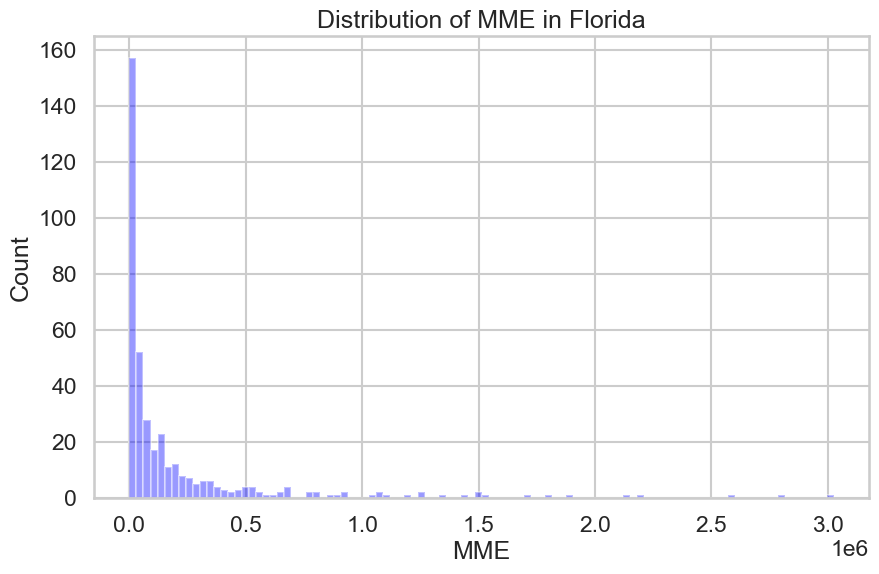

In [45]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10, 6))
sns.distplot(fa['MME'], bins=100, kde=False, color='blue')
plt.title('Distribution of MME in Florida')
plt.xlabel('MME')
plt.ylabel('Count')
plt.show()

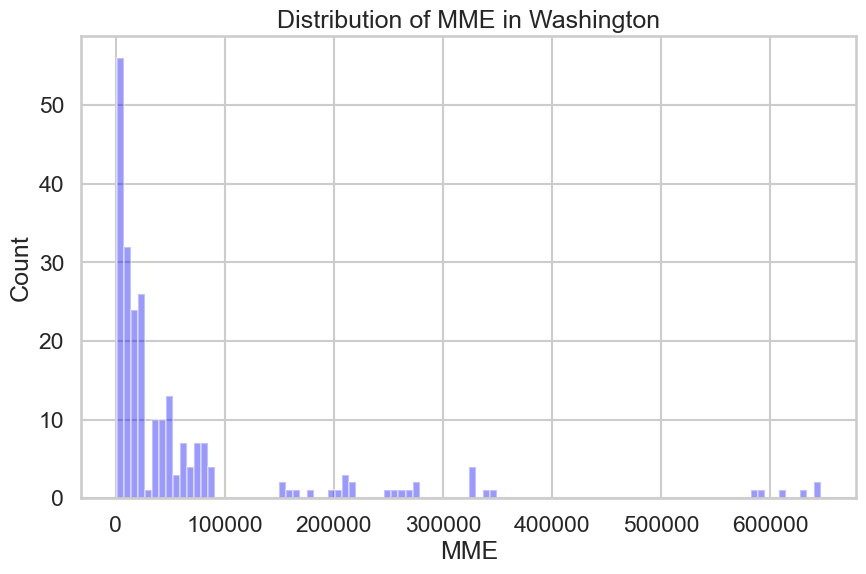

In [46]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10, 6))
sns.distplot(wash['MME'], bins=100, kde=False, color='blue')
plt.title('Distribution of MME in Washington')
plt.xlabel('MME')
plt.ylabel('Count')
plt.show()

In [53]:
fa['Year'] = fa['Year'].astype(int)
wash['Year'] = wash['Year'].astype(int)

rule = alt.Chart(fa).mark_rule(color='red', strokeDash=[5,5], strokeWidth=3).encode(
    x='Year:Q',
    size=alt.value(3)
).transform_filter(
    alt.datum.Year == 2010
)

fig = alt.Chart(fa).mark_line().encode(
    x='Year',
    y='MME',
    color='BUYER_COUNTY'
).properties(
    width=600,
    height=400
)
fig + rule

alt.LayerChart(...)

In [58]:
rule4 = alt.Chart(fa_compare).mark_rule(color='red', strokeDash=[5,5], strokeWidth=3).encode(
    x='Year:Q',
    size=alt.value(3)
).transform_filter(
    alt.datum.Year == 2010
)

fig4 = alt.Chart(fa_compare).mark_line().encode(
    x='Year',
    y='MME',
    color='BUYER_COUNTY'
).properties(
    width=600,
    height=400
)
fig4 + rule4

alt.LayerChart(...)

In [55]:

rule2 = alt.Chart(wash).mark_rule(color='red', strokeDash=[5,5], strokeWidth=3).encode(
    x='Year:Q',
    size=alt.value(3)
).transform_filter(
    alt.datum.Year == 2012
)


fig2 =alt.Chart(wash).mark_line().encode(
    x='Year',
    y='MME',
    color='BUYER_COUNTY'
).properties(
    width=600,
    height=400
)

fig2 + rule2

alt.LayerChart(...)

In [57]:
rule3 = alt.Chart(wash_compare).mark_rule(color='red', strokeDash=[5,5], strokeWidth=3).encode(
    x='Year:Q',
    size=alt.value(3)
).transform_filter(
    alt.datum.Year == 2012
)


fig3 =alt.Chart(wash_compare).mark_line().encode(
    x='Year',
    y='MME',
    color='BUYER_COUNTY'
).properties(
    width=600,
    height=400
)

fig3 + rule3

alt.LayerChart(...)

# ------- DON"T RUN THE FOLLOWING CODE FOR NOW -------

In [ ]:
# Load the data
df = pd.read_csv('prescription_data_grouped_1.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.columns

- There are four columns in the dataset: 'BUYER_STATE', 'BUYER_COUNTY', 'T_YEAR', 'MME'
- 'MME' is a unit of measurement for the amount of opioids prescribed

## Summary Statistics

In [ ]:
# summary statistics of the shipment/prescription data
df.describe()

## More Data Exploration

In [ ]:
df.BUYER_STATE.unique()

In [ ]:
df.T_YEAR.unique()

In [ ]:
year = df.groupby('T_YEAR').sum()
year = year.reset_index()
year

In [ ]:
year.shape

In [ ]:
# plot the distribution of the number of prescriptions in MME across the years
year.plot(x='T_YEAR', y='MME', rot=0, title="MME change change over the years", xlabel="YEAR", ylabel="MME")


- From the plot above, we can see that after 2010, the slope of the MME is decreasing and was increaseing before the policy intervention before 2010.

In [ ]:
buyer_state = df.groupby('BUYER_STATE').sum()
buyer_state = buyer_state.reset_index()
buyer_state = buyer_state.drop(columns = 'T_YEAR')
buyer_state

In [ ]:
# Plot the distribution of the prescriptions in MME across the states
alt.Chart(buyer_state).mark_bar().encode(
    x='BUYER_STATE',
    y='MME',
    color='BUYER_STATE'
)


## 2010 is the policy intervention year

### First State: FL

In [ ]:
fa = pd.read_csv('df_florida_only_grouped.csv')
fa.head()

In [ ]:
fa.describe()[['MME']]

In [ ]:
florida = df[df['BUYER_STATE'] == 'FL']
fl_before = florida[florida['T_YEAR'] < 2010][['MME']]
fl_after = florida[florida['T_YEAR'] > 2010][['MME']]
print(f"The MME of Florida before 2010 policy change is {fl_before.sum()[0]} and after 2010 is {fl_after.sum()[0]}")

In [ ]:
florida.MME.value_counts().sort_values(ascending=True)

In [ ]:
florida[florida['T_YEAR'] == 2010].MME.unique()

In [ ]:
florida[florida['T_YEAR'] == 2010].describe()[['MME']]

In [ ]:
florida['T_YEAR'].unique()

In [ ]:
assert fl_before.sum()[0] > fl_after.sum()[0]

In [ ]:
fl_before.describe()

In [ ]:
fl_after.describe()

In [ ]:
df.BUYER_STATE.unique()

In [ ]:
fl_compare = ['CA','NV','NY']
fl_compare_df = df[df['BUYER_STATE'].isin(fl_compare)]
fl_compare_df_before = fl_compare_df[fl_compare_df['T_YEAR'] < 2010][['MME']]
fl_compare_df_after = fl_compare_df[fl_compare_df['T_YEAR'] > 2010][['MME']]
print(f"The MME of controlled states before 2010 policy change is {fl_compare_df_before.sum()[0]} and after 2010 is {fl_compare_df_after.sum()[0]}")

In [ ]:
fl_compare_df.describe()

In [ ]:
# assume larger then, since not much policy change in the controlled states
assert fl_compare_df_before.sum()[0] < fl_compare_df_after.sum()[0]

In [ ]:
fl_compare_df_before.describe()

In [ ]:
fl_compare_df_after.describe()

### Second State: Texas [We are not taking a look at the Texas because of the policy change happened in 2007 and there's not enough information for us to do it. Something applies to the Washington, which started the policy change not until 2012.

In [ ]:
taxes = df[df['BUYER_STATE'] == 'TX']
taxes.T_YEAR.unique()
tx_before = taxes[taxes['T_YEAR'] < 2010][['MME']]
tx_after = taxes[taxes['T_YEAR'] > 2010][['MME']]
print(f"The MME of Texas before 2010 policy change is {tx_before.sum()[0]} and after 2010 is {tx_after.sum()[0]}")


In [ ]:
taxes.describe()

In [ ]:
taxes.T_YEAR.unique()

In [ ]:
tx_before.sum()[0] > tx_after.sum()[0]

There are more MME after the policy intervention

In [ ]:
tx_compare = ['AK','CA','GA','NY', 'MO','WY']
tx_compare_df = df[df['BUYER_STATE'].isin(tx_compare)]
tx_compare_df_before = tx_compare_df[tx_compare_df['T_YEAR'] < 2010][['MME']]
tx_compare_df_after = tx_compare_df[tx_compare_df['T_YEAR'] > 2010][['MME']]
print(f"The MME of controlled states before 2010 policy change is {tx_compare_df_before.sum()[0]} and after 2010 is {tx_compare_df_after.sum()[0]}")

In [ ]:
tx_compare_df.describe()